# House Rent Prediction

**Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**Loading the Dataset

In [2]:
rent_df = pd.read_csv(r"C:\Users\AISHWARYA\Project\House_Rent_Dataset.csv.csv")
rent_df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2571,2022-06-04,1,24000,600,4 out of 4,Carpet Area,Rajouri Garden,Delhi,Furnished,Bachelors,1,Contact Agent
4170,2022-06-12,2,9500,103,2 out of 4,Super Area,"Boduppal, NH 2 2",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
3374,2022-05-06,2,13000,780,1 out of 2,Super Area,Madipakkam,Chennai,Furnished,Bachelors/Family,2,Contact Owner
4268,2022-06-18,2,25000,1100,1 out of 7,Super Area,"Upparpally, Hyderabad Expressway",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
1226,2022-05-22,2,46000,725,Upper Basement out of 16,Carpet Area,Chembur,Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent


**Checking Shape of the Dataset

In [3]:
rent_df.shape

(4746, 12)

**Checking all the Columns in the Dataset

In [4]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**Information about the Dataset

In [5]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Checking if there is any Null value present in the Dataset?

In [7]:
rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**Checking if there is any Duplicate value present in the Dataset?

In [8]:
rent_df.duplicated().sum()

0

**Checking Mean, Median, Maximum & Minimum House Rents

In [9]:
print("Mean House Rent:", round(rent_df["Rent"].mean()))
print("Median House Rent:", round(rent_df["Rent"].median()))
print("Highest House Rent:", round(rent_df["Rent"].max()))
print("Lowest House Rent:", round(rent_df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


**5 Highest House Rents present in the Dataset

In [11]:
rent_df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

**5 Lowest House Rents present in the Dataset

In [12]:
rent_df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

**Bar Plot for Number of House in Each City which is Available for Rent

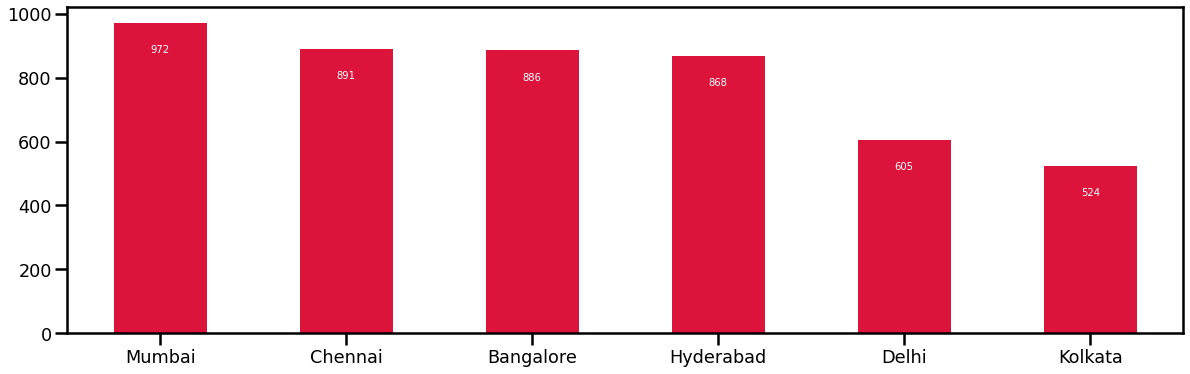

In [13]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = rent_df["City"].value_counts().plot(kind = 'bar', color = "crimson", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')

**Bar Plot on Different Types of Furnishing Status

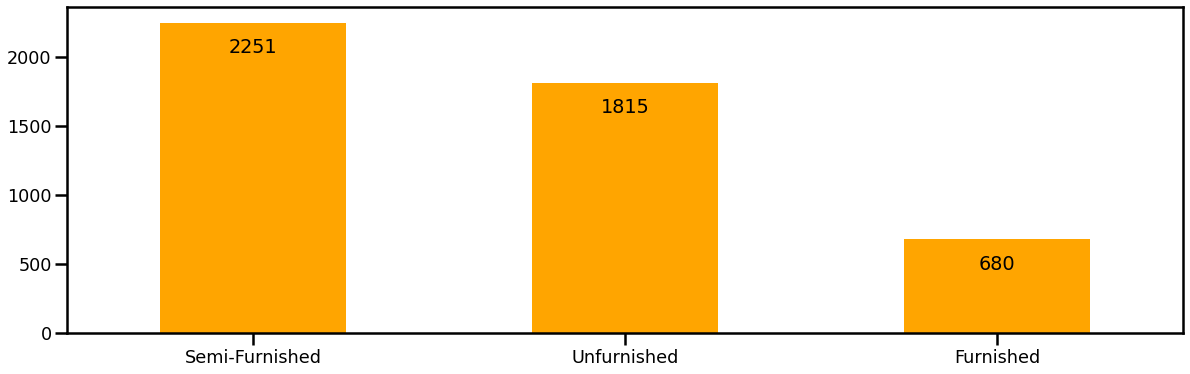

In [14]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = rent_df["Furnishing Status"].value_counts().plot(kind = 'bar', color = "Orange", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha = 'center', va = 'bottom', color = 'Black')

**Bar Plot on Different Types of Tenant Preferred

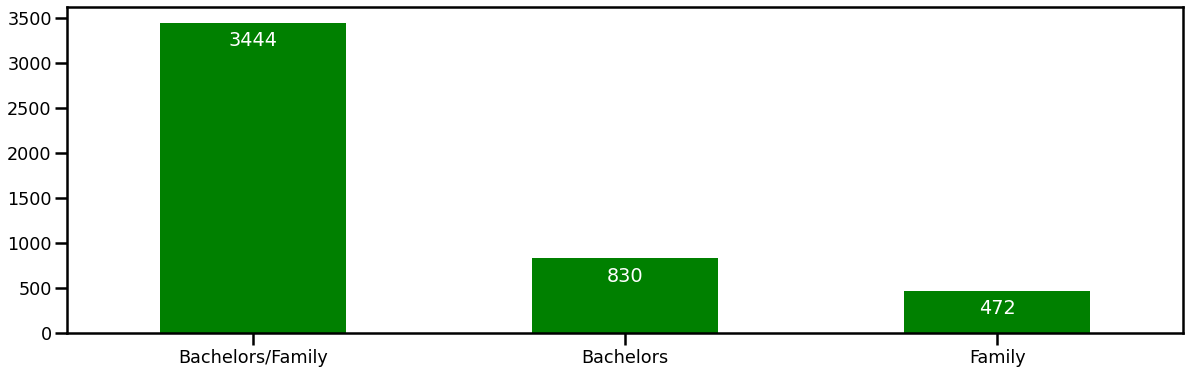

In [15]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = rent_df["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300), ha = 'center', va = 'bottom', color = 'White')

**Pie Plot on Cities to check the distribution

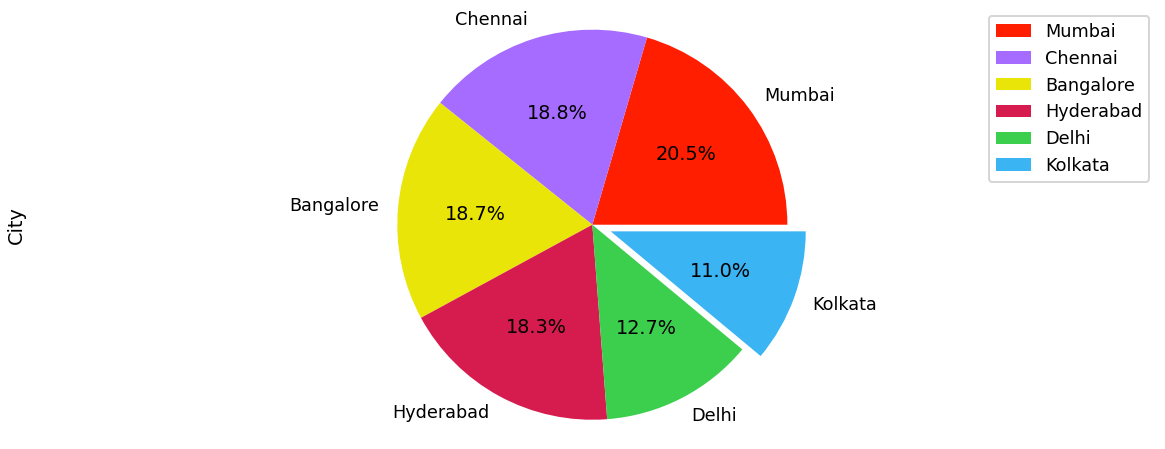

In [16]:
plt.figure(figsize = (20, 8))
counts = rent_df["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**Scatter Plot on House Rents vs House Sizes

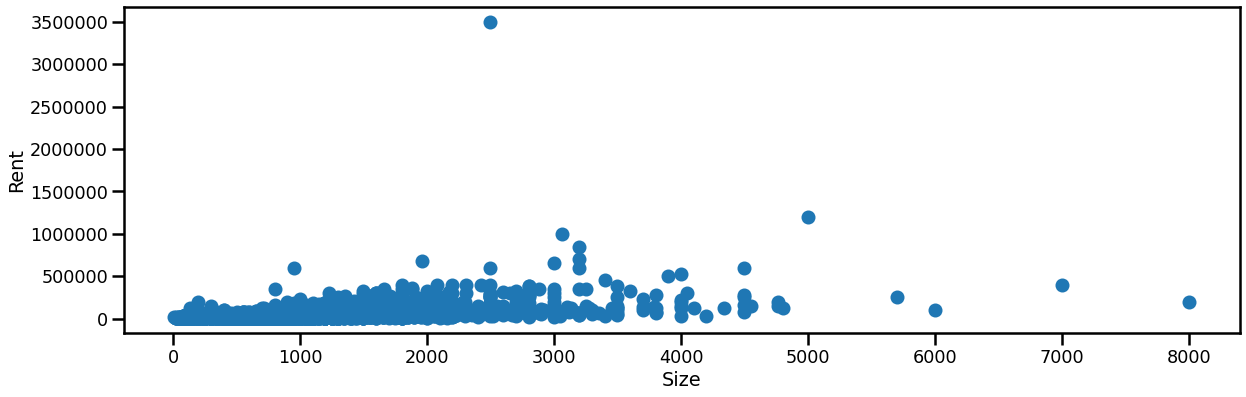

In [17]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(rent_df["Size"], rent_df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

**Relationship between House Rent vs House Sizes

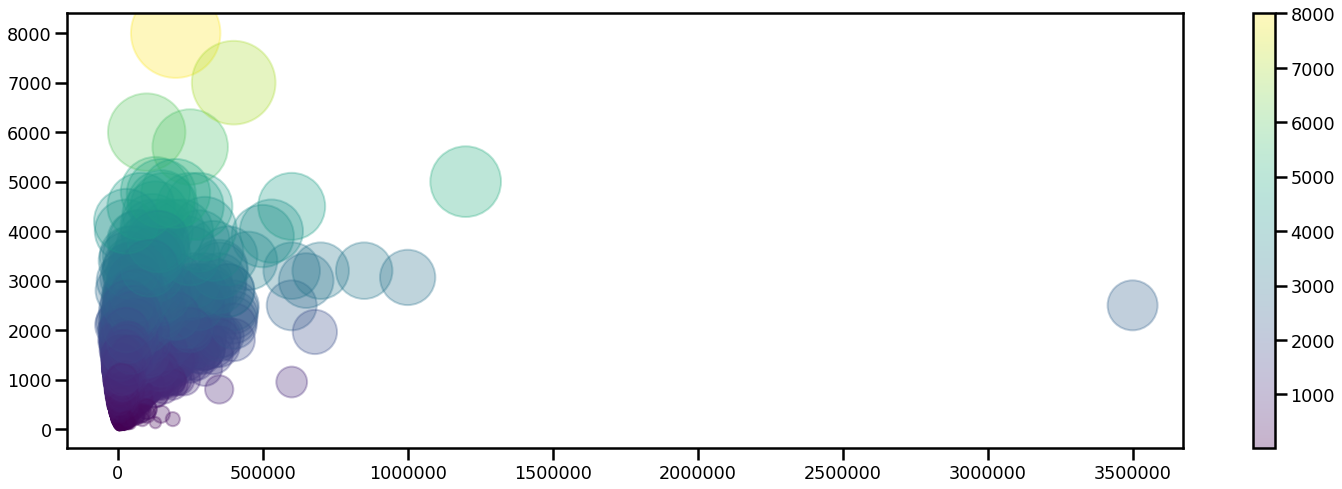

In [19]:
x = rent_df["Rent"]
y = rent_df["Size"]
colors = rent_df["Size"]
sizes = rent_df["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

**Bar Plot for City vs House Rent

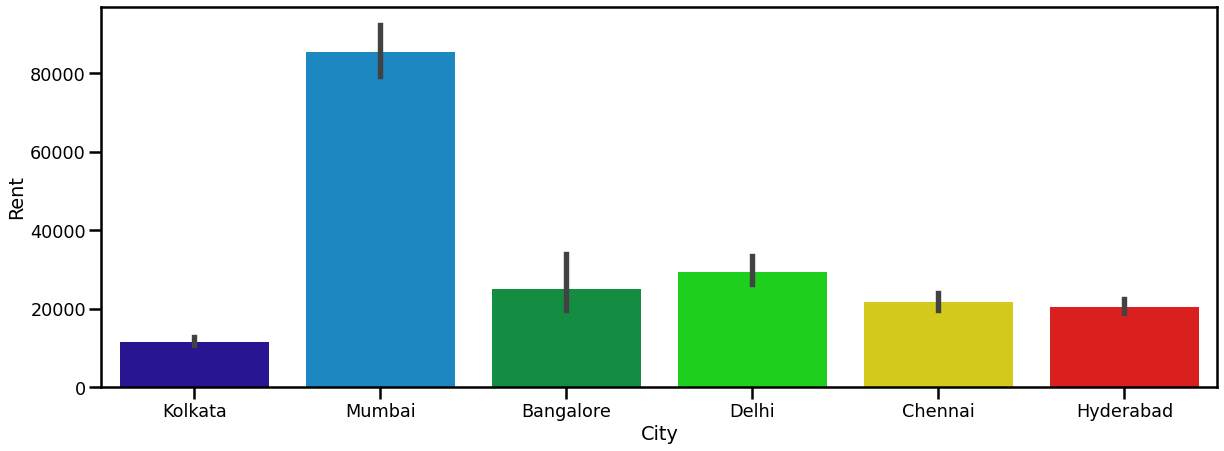

In [20]:
plt.figure(figsize = (20, 7))
sns.barplot(x = rent_df["City"], y = rent_df["Rent"], palette = "nipy_spectral");

**Histogram on House Sizes

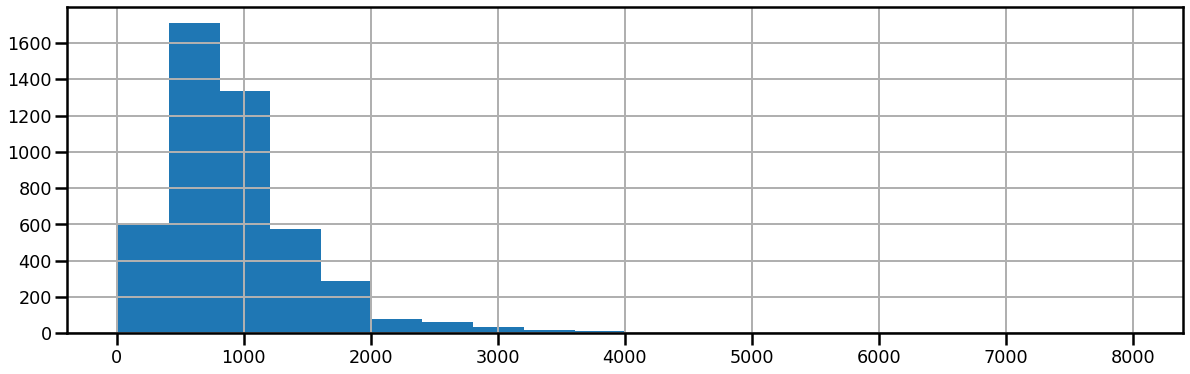

In [21]:
n_bins = 20
plt.figure(figsize = (20, 6))
rent_df["Size"].hist(bins = n_bins);

<AxesSubplot:xlabel='BHK', ylabel='Area Type'>

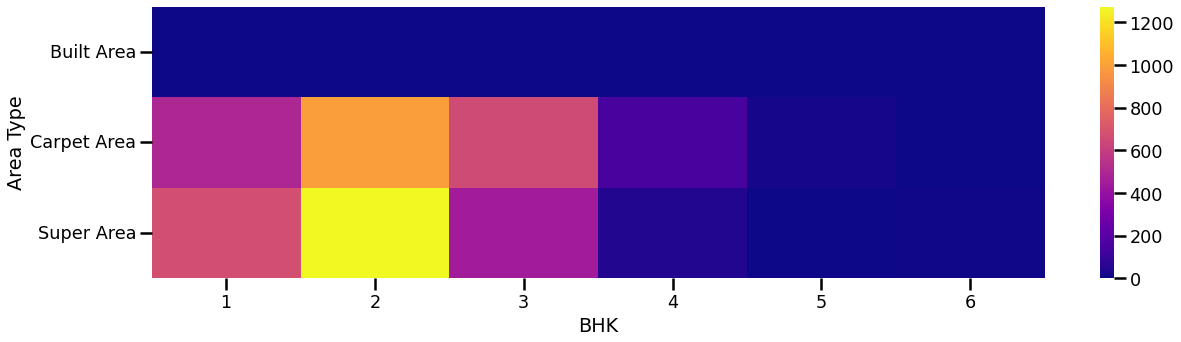

In [22]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(rent_df["Area Type"], rent_df["BHK"]), cmap = colormap)

<Figure size 1080x720 with 0 Axes>

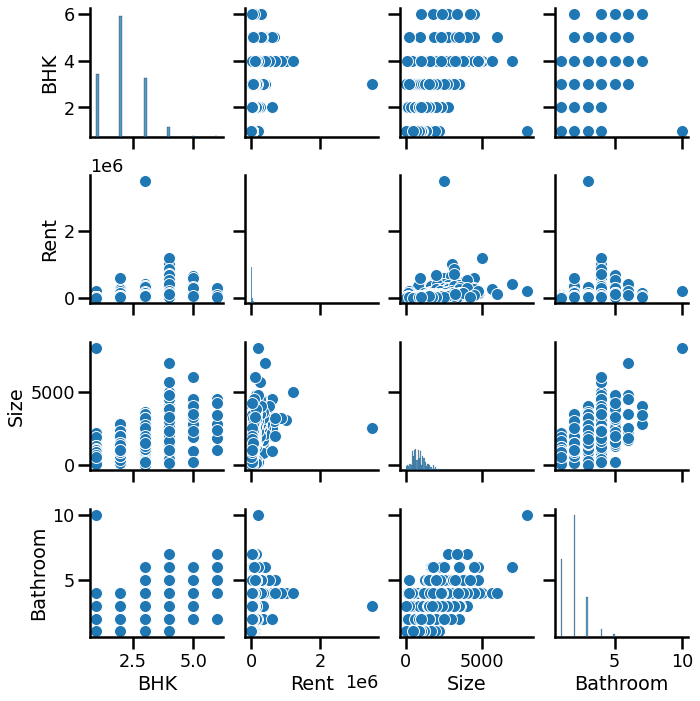

In [23]:
data = rent_df.copy()
features = list(rent_df.columns)
plt.figure(figsize=(15,10))
sns.pairplot(data)

In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [48]:
rent_df = pd.read_csv(r"C:\Users\AISHWARYA\Project\House_Rent_Dataset.csv.csv")

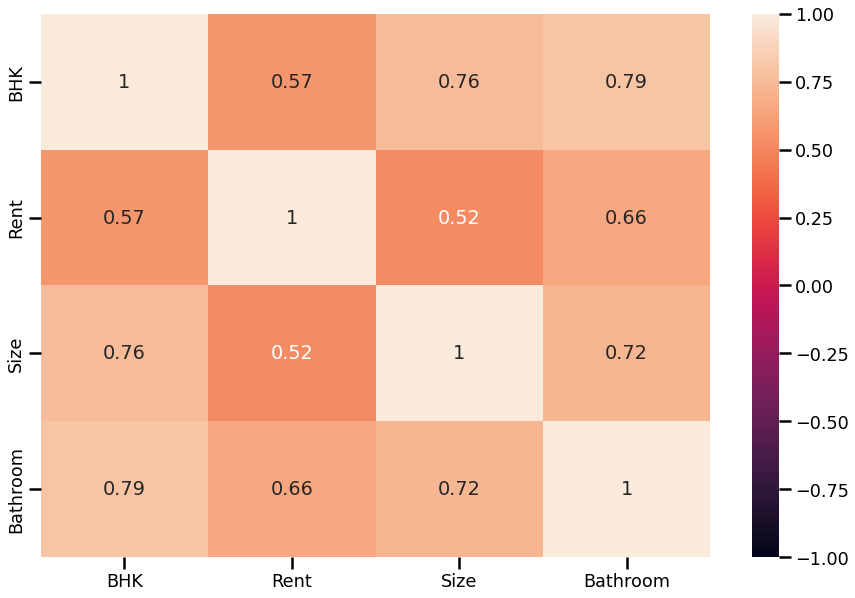

In [51]:
correlation = rent_df[list(rent_df.copy().columns)].corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

**Evaluate Model

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [26]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [28]:
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [29]:
y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


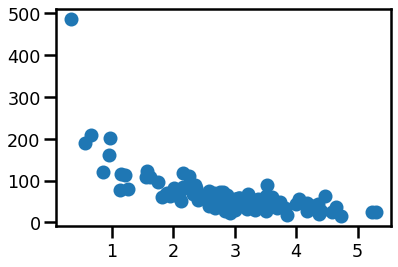

In [34]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [35]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

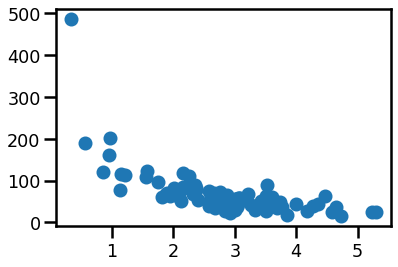

In [36]:
plt.scatter(train_x, train_y)
plt.show()

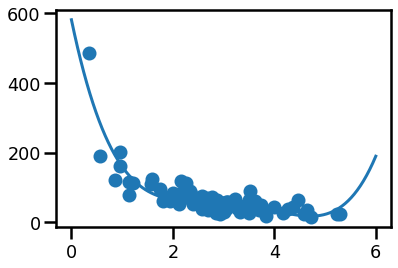

In [37]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [32]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629795


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=25, max_depth=12)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_cm = confusion_matrix(y_test, rf_predict)
print("Accuracy of Random Forest:", rf_accuracy)
print("Random Forest Confusion Matrix:", rf_cm)
print(classification_report(y_test, rf_predict))

Accuracy of Random Forest: 0.9333333333333333
Random Forest Confusion Matrix: [[12  1  0]
 [ 1 15  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.88      0.91        17
           2       0.94      1.00      0.97        15

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



**Confusion Matrix

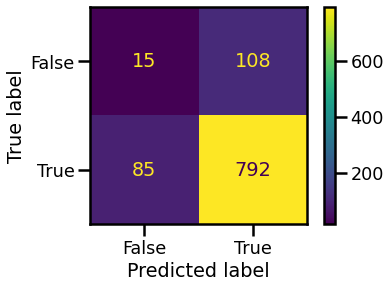

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()